# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Chua, Winonna Kylie\
_Student No._: 2022-09120\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: November 4, 2024 | 11:35 A.M.

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Winonna Kylie C. Chua**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

The relationship between x and y can be observed in Plot 1


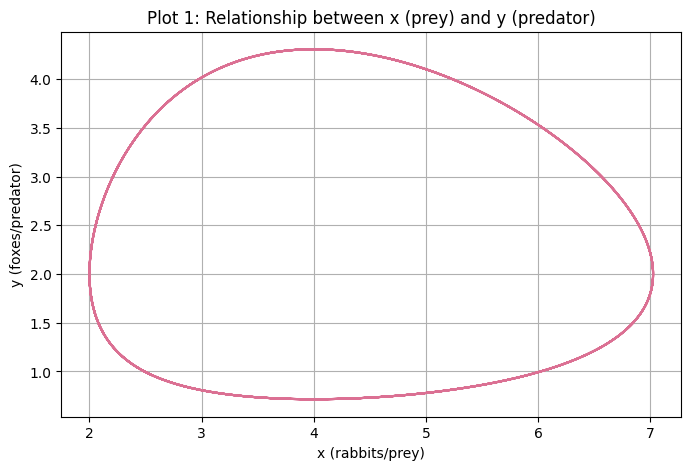


Plotting x and y as a function of time, we obtain:


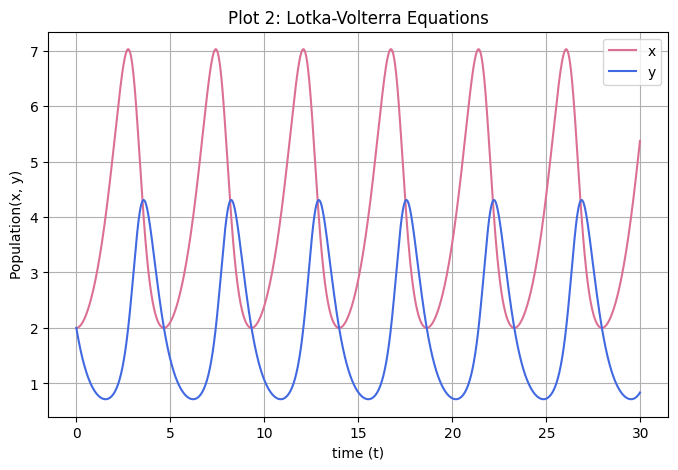

In [ ]:
from numpy import array, arange
import matplotlib.pyplot as plt

# 1. Solving the two equations using RK4 method for the case alpha = 1, beta = gamma = 0.5, delta = 2, starting from x = y = 2

# given values for parameters
alpha = 1                                    # parameter for (exponential) prey growth rate
beta = 0.5                                   # parameter for rate predators kill prey
gamma = 0.5                                  # parameter for growth rate of predators from killing prey
delta = 2                                    # parameter for (exponential) death rate of predators

def f(r,t):                                  # defining function of r (vector with x and y components) and time (t) as an array that contains the first derivatives of x and y with respect to time
  x = r[0]                                   # x is the first element of array 'r'
  y = r[1]                                   # y is the second element of array 'r'
  fx = alpha*x - beta*x*y                    # given function dx/dt (rate of change of prey's population is equal to its growth rate minus the rate at which it is preyed upon)
  fy = gamma*x*y - delta*y                   # given function dy/dt (rate of change of predator's population is equal to its growth rate minus its death rate)
  return array([fx,fy],float)

a = 0.0                                      # initial time
b = 30.0                                     # final time
N = 2000                                     # number of Runge-Kutta steps
h = (b-a)/N                                  # size of Runge-Kutta steps

tpoints = arange(a,b,h)                      # tpoints ranges from a to b in steps of h
xpoints = []                                 # empty list to store values of x
ypoints = []                                 # empty list to store values of y

r = array([2.0,2.0], float)                  # r is an array with x = y = 2 as the initial conditions
for t in tpoints:
  xpoints.append(r[0])                       # adds values of r[0] (first element of r) to list 'xpoints'
  ypoints.append(r[1])                       # adds values of r[1] (second element of r) to list 'ypoints'
  k1 = h*f(r,t)                              # RK4 equations
  k2 = h*f(r+0.5*k1,t+0.5*h)
  k3 = h*f(r+0.5*k2,t+0.5*h)
  k4 = h*f(r+k3,t+h)
  r += (k1+2*k2+2*k3+k4)/6

print("The relationship between x and y can be observed in Plot 1")
plt.figure(figsize = (8, 5))                                            # changes the size of figure
plt.plot(xpoints, ypoints, color = "palevioletred")                     # plots xpoints and ypoints
plt.title("Plot 1: Relationship between x (prey) and y (predator)")     # plot title
plt.xlabel("x (rabbits/prey)")                                          # labels the x-axis
plt.ylabel("y (foxes/predator)")                                        # labels the y-axis
plt.grid()                                                              # adds grids in the plot
plt.show()                                                              # displays the plot
print("")

# 2. Making a graph that shows both x and y as a function of time (wherein t ranges from 0 to 30)

print("Plotting x and y as a function of time, we obtain:")
plt.figure(figsize = (8, 5))                                            # changes the size of figure
plt.plot(tpoints, xpoints, label = "x", color = "palevioletred")        # plots tpoints and xpoints
plt.plot(tpoints, ypoints, label = "y", color = "royalblue")            # plots tpoints and ypoints
plt.title("Plot 2: Lotka-Volterra Equations")                           # plot title
plt.legend()                                                            # legend of the plot
plt.xlabel("time (t)")                                                  # labels the x-axis
plt.ylabel("Population(x, y)")                                          # labels the y-axis
plt.grid()                                                              # adds grids in the plot
plt.show()                                                              # displays the plot

In [ ]:
# Discussion of results:

  # Eliminating dt from the two differential equations gives the differential equation dx/dy = (x(alpha - beta*y))/(y(gamma*x - delta)).
  # Solving this, we obtain gamma*x - delta*ln(x) - alpha*ln(y) + beta*y = constant (intrinsic relationship between x and y).

  # Explanation of Plot 1:
    # This plot shows the Lotka-Volterra orbit in phase space with initial conditions x = y = 2.
      # The orbit moves in a counter-clockwise direction because the phase of x occurs before the phase of y.
    # In the plot, it can be observed that the prey population "recovers" or does not go extinct despite its low number.
      # In real life, low prey population is more likely to go extinct.
    # The predator population "crash" occurs when the prey population almost reaches extinction.

  # Explanation of Plot 2:
    # This plot demonstrates the dynamics between the prey-predator population.
    # When the prey population rapidly increases, the predator population also increases.
    # As the predators eat the prey, the prey population decreases which also causes the predator population to decrease (since there are less prey to eat).
    # Then, with a decrease in predator population, the prey population increases once again thus repeating the cycle.
    # In short, a boom-bust pattern can be observed in the dynamics between the prey and predator population.
    # This does not accurately portray the prey-predator dynamics in real life.
      # Prey-predator competition is not taken into account.
      # Unrealistic assumption of prey population growth rate.
      # Unrealistic assumption of predator population consumption (their apetite is insatiable).

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


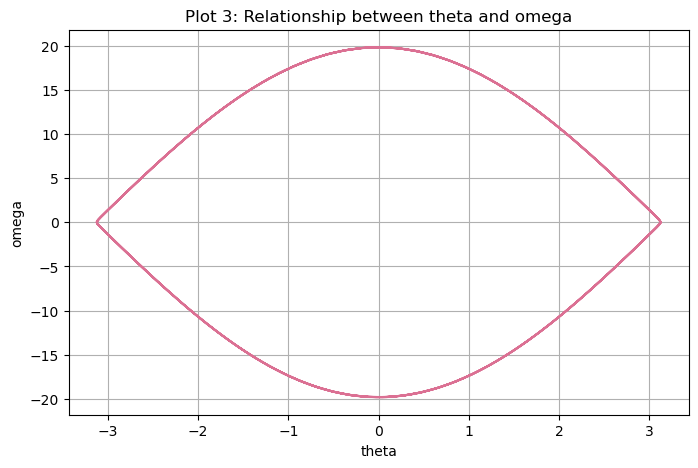

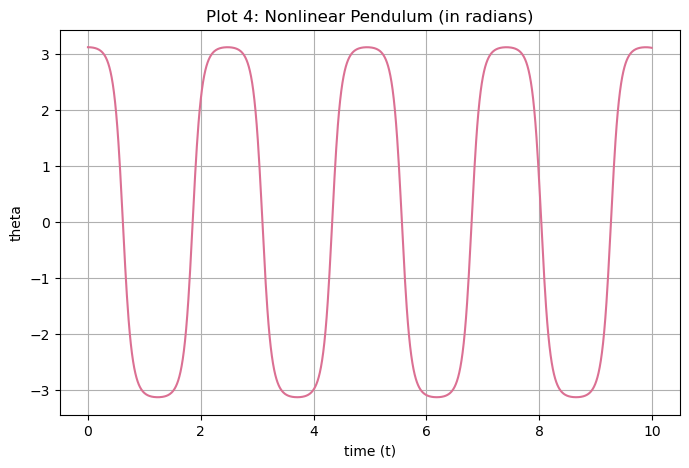

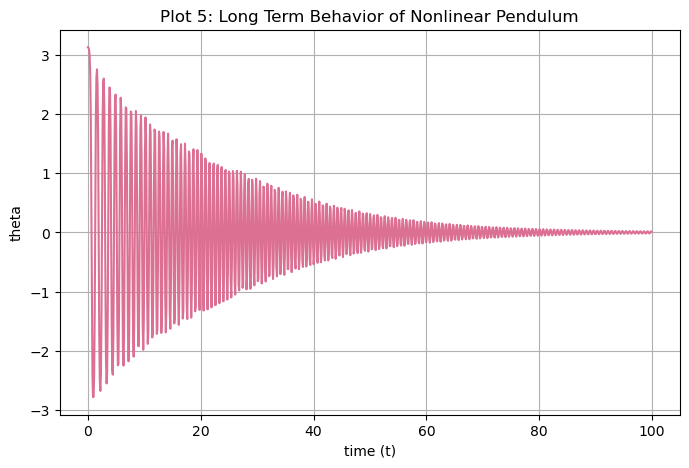

In [18]:
from numpy import array, arange, radians
from math import sin
from pylab import xlim
import matplotlib.pyplot as plt

# 1. Solving the two equations using RK4 method for a pendulum with a 10 cm arm, given that theta = 179

# constants
g = 9.81              # acceleration due to gravity
l = 0.1               # length in meters

def f(r1,t):                                 # defining function of r1 (vector with theta1 and omega1 components) and time (t) as an array that contains the first derivatives of theta and omega with respect to time
  theta1 = r1[0]                             # theta1 is the first element of array 'r1'
  omega1 = r1[1]                             # omega1 is the second element of array 'r1'
  ftheta1 = omega1                           # given function dtheta/dt (rate of change of theta1 is equal to omega1 - this is used to simply the 2nd order ODE into two 1st order ODEs)
  fomega1 = -(g/l)*sin(theta1)               # given function domega/dt (obtained through Newton's second law)
  return array([ftheta1, fomega1], float)

a1 = 0.0                                     # initial time
b1 = 10.0                                    # final time
N1 = 1000                                    # number of Runge-Kutta steps
h1 = (b1-a1)/N1                              # size of Runge-Kutta steps

tpoints1 = arange(a1,b1,h1)                  # tpoints1 ranges from a to b in steps of h
theta1points = []                            # empty list to store values of theta1
omega1points = []                            # empty lst to store values of omega1

r1 = array([radians(179.0),0.0], float)      # r1 is an array with theta1 = 179 and omega1 = 0 as the initial conditions
for t in tpoints1:
  theta1points.append(r1[0])                 # adds values of r1[0] (first element of r1) to list 'theta1points'
  omega1points.append(r1[1])                 # adds values of r1[1] (first element of r1) to list 'omega1points'
  k1 = h1*f(r1,t)                            # RK4 equations
  k2 = h1*f(r1+0.5*k1,t+0.5*h1)
  k3 = h1*f(r1+0.5*k2,t+0.5*h1)
  k4 = h1*f(r1+k3,t+h1)
  r1 += (k1+2*k2+2*k3+k4)/6

# defined another function to evaluate the long term (t=0 to t=100) behavior of the nonlinear pendulum

def f(r2,t):                                 # defining function of r2 (vector with theta2 and omega2 components) and time (t) as an array that contains the first derivatives of theta and omega with respect to time
  theta2 = r2[0]                             # theta2 is the first element of array 'r2'
  omega2 = r2[1]                             # omega2 is the second element of array 'r2'
  ftheta2 = omega2                           # given function dtheta/dt (rate of change of theta2 is equal to omega2 - this is used to simply the 2nd order ODE into two 1st order ODEs)
  fomega2 = -(g/l)*sin(theta2)               # given function domega/dt (obtained through Newton's second law)
  return array([ftheta2, fomega2], float)

a2 = 0.0                                     # initial time
b2 = 100.0                                   # final time
N2 = 1000                                    # number of Runge-Kutta steps
h2 = (b2-a2)/N2                              # size of Runge-Kutta steps

tpoints2 = arange(a2,b2,h2)                  # tpoints2 ranges from a to b in steps of h
theta2points = []                            # empty list to store values of theta2
omega2points = []                            # empty lst to store values of omega2

r2 = array([radians(179.0),0.0], float)      # r2 is an array with theta2 = 179 and omega2 = 0 as the initial conditions
for t in tpoints2:
  theta2points.append(r2[0])                 # adds values of r2[0] (first element of r2) to list 'theta2points'
  omega2points.append(r2[1])                 # adds values of r2[1] (first element of r2) to list 'omega2points'
  k1 = h2*f(r2,t)                            # RK4 equations
  k2 = h2*f(r2+0.5*k1,t+0.5*h2)
  k3 = h2*f(r2+0.5*k2,t+0.5*h2)
  k4 = h2*f(r2+k3,t+h2)
  r2 += (k1+2*k2+2*k3+k4)/6

plt.figure(figsize = (8, 5))                                    # changes the size of figure
plt.plot(theta1points, omega1points, color = "palevioletred")   # plots theta1points and omega1points
plt.title("Plot 3: Relationship between theta and omega")       # plot title
plt.xlabel("theta")                                             # labels for x-axis
plt.ylabel("omega")                                             # labels the y-axis
plt.grid()                                                      # adds grids in the plot
plt.show()                                                      # displays the plot

# 2. Making a graph that shows theta as a function of time
plt.figure(figsize = (8, 5))                                    # changes the size of figure
plt.plot(tpoints1, theta1points, color = "palevioletred")       # plots tpoints1 and thetapoints1
plt.title("Plot 4: Nonlinear Pendulum (in radians)")            # plot title
plt.xlabel("time (t)")                                          # labels the x-axis
plt.ylabel("theta")                                             # labels the y-axis
plt.grid()                                                      # adds grids in the plot
plt.show()                                                      # displays the plot

plt.figure(figsize = (8, 5))                                    # changes the size of figure
plt.plot(tpoints2, theta2points, color = "palevioletred")       # plots tpoints2 and thetapoints2
plt.title("Plot 5: Long Term Behavior of Nonlinear Pendulum")   # plot title
plt.xlabel("time (t)")                                          # labels the x-axis
plt.ylabel("theta")                                             # labels the y-axis
plt.grid()                                                      # adds grids in the plot
plt.show()                                                      # displays the plot


In [ ]:
# Discussion of results:

  # Explanation of Plot 3:
    # In this plot, theta (angle) and omega (speed) are plotted in the phase space.
    # The shape of the plot describes the motion of the pendulum.
      # It is more elongated and has two sharp edges (resembles the shape of an eye).
      # Since the value of theta is close to pi (180 degrees / 3.14), we see that the edges occur when theta is near positive and negative 3 and omega is approximately 0.
        # The plot is more elongated since the pendulum is able to have a greater swing (due to great theta value).
        # The edges denote the slight "pause" during the swing motion of the pendulum (this happens whenever theta = 179 degrees).

  # Explanation of Plot 4:
    # The waves in this plot have peaks that appear "extended".
      # The slight "pause" in the pendulum's motion causes the peaks to be slightly extended.
      # For a linear pendulum, the peak of the waves are more "sharp" but still smooth.
    # In this plot, we observe that the waves are periodic but not sinusoidal (this is expected due to the value of theta).
      # Sinusoidal waves occur when small angle approximation is applied.
      # Since theta is a great value (very close to pi) and exceeds the small angle limit (< 15 degrees), simple harmonic motion is not achievable.

  # Explanation of Plot 5:
    # Observing the nonlinear pendulum's behavior (with the same numer of samples) for a longer time interval, we can observe a decay.
      # For a system wherein there is no air resistance and damping, the total energy is conserved.
      # Decay can be attributed to the fact that RK method doesn't conserve energy unlike other methods (e.g. leapfrog method).
    # For a case wherein we have higher N values, the value of h would be smaller.
      # When this is plotted, the oscillations would have very little to no decay.  
      # This can possibly be attributed to small angle approximation (smaller h would lead to smaller theta value).
